<a href="https://colab.research.google.com/github/Amal-Baby-Mathews/Amal_TensorFlow2.0/blob/main/ImprovedLSTMModeltrainingwithCORRELATEDdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shap
!pip install google-generativeai
!pip install wandb

In [2]:
import numpy as np
import pandas as pd
import wandb #Wandb import
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Input, Reshape
from tensorflow.keras.callbacks import EarlyStopping
from shap import KernelExplainer, summary_plot,sample

# **Notes on data preprocessing and the method used**
Selection process of the input fields:
From Operational Parameters defined in (Cinar, Samet, Senem Onen Cinar, Nils Wieczorek, Ihsanullah Sohoo, and Kerstin Kuchta. 2021. "Integration of Artificial Intelligence into Biogas Plant Operation" Processes 9, no. 1: 85. https://doi.org/10.3390/pr9010085)
Initial selection of fields:

be_stream2methane	al_productgasoutlet_temp

pdc_powermeterphasenuetral_amps

be_ambient_tt_scaled_value	be_scg_n2

be_system_abort_shutdown

In [3]:
# """ These are the data preprocessing steps taken from the dataset provided
# import pandas as pd
# import os
# def print_hour_from_timestamp(file_path, datetime_col='timestamp'):

#     Read a CSV file and print the hour of the recorded timestamp field for each line.

#     Args:
#         file_path (str): Path to the CSV file.
#         datetime_col (str, optional): Name of the column containing the datetime values. Default is 'timestamp'.
#     # Read the CSV file
#     df = pd.read_csv(file_path,usecols=fieldnames,nrows=3000)
#     df=df.dropna()
#     # Find and convert columns with 't' or 'f' values
#     for col in df.columns:
#         if df[col].dtype == object:  # Check for text columns
#             df[col] = df[col].replace({'t': 1, 'f': 0})
#     # Convert the datetime column to datetime format if it's not already
#     if not pd.api.types.is_datetime64_any_dtype(df[datetime_col]):
#         df[datetime_col] = pd.to_datetime(df[datetime_col])
#     df = df.sort_values(by=datetime_col)
#   # Group by date and then by hour
#     grouped = df.groupby([df[datetime_col].dt.date, df[datetime_col].dt.hour , df[datetime_col].dt.minute])

#     # Get the first row of each hour within each date group
#     first_hour_data = grouped.head(1)

#     # Print the results
#     print("First hour data: ",first_hour_data)
#     return first_hour_data

# folder_name=input("Enter the folder name: ")
# folder_path = r"C:\Users\seq_amal\biogas_dataset\{}".format(folder_name)
# fieldnames= [
#     'timestamp', 'be_aircomp_overlaptime_sp', 'be_aircomp_runtime_sp', 'be_ambient_tt_scaled_value', 'be_chiller_temp_sp',
#     'be_fc1_7031_xrc2_todayvol_real', 'be_fc1_7036_xrc2_todayenergy_real', 'be_fc1_7039_xmv2_sp_psia_dint',
#     'be_fc1_7039_xmv2_sp_psia_real', 'be_fc1_7042_xrc1_todayvol_real', 'be_fc1_7047_xrc1_todayenergy_real_mmbtu',
#     'be_fc1_7050_xmv1_sp_psia_dint', 'be_fc1_7050_xmv1_sp_psia_real', 'be_in_pa001a_spare', 'be_in_pa001b_spare',
#     'be_in_spare_local6_7', 'be_in_spare_msr111_estop', 'be_productgas_ch4', 'be_system_abort_bypass',
#     'be_system_abort_recycle', 'be_system_abort_shutdown', 'be_system_abort_standby', 'be_system_offspec',
#     'be_system_running', 'be_testaoi_o_scaled_value', 'be_aircomp1_faultstatus', 'be_aircomp1_runcmd',
#     'be_aircomp1_runstatus', 'be_aircomp2_faultstatus', 'be_aircomp2_runcmd', 'be_aircomp2_runstatus',
#     'be_airliquide_faultstatus', 'be_airliquide_runcmd', 'be_airliquide_runstatus', 'be_airliquideinlet_temperature_tt499',
#     'be_carbonvesselinlet_temperature_tt496', 'be_carbonvesselinletflow_ft418', 'be_compressordischarge_pressure_pt201',
#     'be_compressorsuction_pressure_pt303', 'be_condensatelevel_lt711', 'be_dginletisolationvalve105_closed',
#     'be_dginletisolationvalve105_open', 'be_dgventgasvalve172_closed', 'be_dgventgasvalve172_open',
#     'be_digestergas_temperature_tt127', 'be_flare_faultstatus', 'be_flare_runcmd', 'be_flare_runstatus',
#     'be_flarehandvalve144_closed', 'be_flarehandvalve144_open', 'be_gdchiller_faultstatus', 'be_gdchiller_runcmd',
#     'be_gdchiller_runstatus', 'be_h2sremovalvalve181_closed', 'be_h2sremovalvalve181_open', 'be_is_vilter1_targetsp',
#     'be_is_vilter2_targetsp', 'be_instrumentair_pressure_pt826', 'be_pgoffspecreturnvalve630_closed',
#     'be_pgoffspecreturnvalve630_open', 'be_pgoutletvalve604_closed', 'be_pgoutletvalve604_open',
#     'be_pgtruckunloadvalve644_closed', 'be_pgtruckunloadvalve644_open', 'be_pgventgasvalve603_closed',
#     'be_pgventgasvalve603_open', 'be_scg_ch4', 'be_scg_co2', 'be_scg_energytotal', 'be_scg_flowindicator',
#     'be_scg_general_alarm', 'be_scg_h2s', 'be_scg_n2', 'be_scg_o2', 'be_scg_offspec_alarm', 'be_scg_offspeclatch_alarm',
#     'be_scg_online_status', 'be_scg_pressureindicator', 'be_scg_temperatureindicator', 'be_scg_totaldaily',
#     'be_stream1co2', 'be_stream1flow', 'be_stream1h2s', 'be_stream1methane', 'be_stream1n2', 'be_stream1o2',
#     'be_stream1pressure', 'be_stream1temp', 'be_stream2co2', 'be_stream2flow', 'be_stream2h2s', 'be_stream2methane',
#     'be_stream2n2', 'be_stream2o2', 'be_stream2pressure', 'be_stream2temp', 'be_stream3co2', 'be_stream3flow',
#     'be_stream3h2s', 'be_stream3methane', 'be_stream3n2', 'be_stream3o2', 'be_stream3pressure', 'be_stream3temp',
#     'be_sumplevel_lt171', 'be_sumpvalve173_closed', 'be_sumpvalve173_open', 'be_systemfault_1', 'be_systemfault_2',
#     'be_systemfault_3', 'be_vilterchiller_faultstatus', 'be_vilterchiller_runcmd', 'be_vilterchiller_runstatus',
#     'be_viltercomp1_faultstatus', 'be_viltercomp1_runcmd', 'be_viltercomp1_runstatus', 'be_viltercomp2_faultstatus',
#     'be_viltercomp2_runcmd', 'be_viltercomp2_runstatus', 'be_wastegasflow_ft437', 'al_cr_7_do', 'al_fv_3a_2b_do',
#     'al_fv_9_cmd', 'al_systemfaults_1', 'al_systemfaults_2', 'al_productgasoutlet_temp', 'al_zi_2_do', 'al_zi_5_do',
#     'al_filter2_differentialpressure', 'al_flowcontrolvalve_position', 'al_hex2filter_level', 'al_pit3_pressure',
#     'al_pit7_pressure', 'al_premembranegaso2_analyzervalue', 'al_processgasinlet_pressure', 'al_processgasinlet_temp',
#     'al_productgas_pressure', 'al_productgasco2_analyzervalue', 'al_productgaso2_analyzervalue', 'al_stage1permeate_pressure',
#     'vl_chiller_suctionscrubberinlet_pressure', 'vl_chiller_suctionscrubberoutlet_pressure',
#     'vl_chiller_dischargescrubberinlet_pressure', 'vl_chiller_dischargescrubberoutlet_pressure',
#     'vl_chiller_aftercoolerinlet_temp', 'vl_chiller_aftercooleroutlet_temp', 'vl_chiller_dischargescrubberoutlet_temp',
#     'vl_chiller_reheateroutlet_temp', 'vl_chiller_recyclevalve_position', 'pdc_powermeter3ph_watts', 'pdc_powermeterab_voltage',
#     'pdc_powermeteraan_voltage', 'pdc_powermeterbc_voltage', 'pdc_powermeterphasea_amps', 'pdc_powermeterphaseb_amps',
#     'pdc_powerpeterphasec_amps', 'pdc_powermeterphasenuetral_amps', 'fl_flamearrestor_temp', 'fl_inletvalve_closed', 'fl_inletvalve_open', 'fl_inlet_flow', 'fl_mainflame_on', 'fl_pilotflame_on', 'fl_pilotflame_temp', 'fl_propanetankvalve_open', 'fl_stackfire_temp', 'fl_stacktip_temp', 'gd_chiller_glycoltemp_sp', 'gd_chiller_reservoir_level', 'gd_chiller_returnline_temp', 'gd_chiller_supplyline_pressure', 'gd_chiller_supplyline_temp'
# ]
# output_file = r"C:\Users\seq_amal\biogas_dataset\temperory_dataset_with_timestamp_test_2.csv"
# csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]
# datetime_col = "timestamp"
# dates=set()
# if csv_files:
#     combined_dataset = pd.DataFrame(columns=fieldnames)

#     for file in csv_files:
#         file_path = os.path.join(folder_path, file)
#         #current_df = pd.read_csv(file_path, usecols=fieldnames)
#         df=print_hour_from_timestamp(file_path, datetime_col=datetime_col)
#         combined_dataset = pd.concat([combined_dataset, df], ignore_index=True)

#     combined_dataset['be_system_abort_shutdown'] = combined_dataset['be_system_abort_shutdown'].replace({'f': 0, 't': 1})
#     combined_dataset.to_csv(output_file, index=False)
#     print(f"CSV files appended to: {output_file}")

# else:
#     print("No CSV files found in the specified folder.")
# """

In [4]:
from google.colab import userdata
wandbkey=userdata.get('WANDB_KEY')
wandb.login(key=wandbkey)


wandb: Currently logged in as: amalbmat2001 (abmabm). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
run = wandb.init(project="lstm_biogas_project")


In [7]:
shift =-1000
datawindow=1000
threshold=0.7 #failure threshold of the probabilty of failure
target='be_system_abort_shutdown'

In [13]:

data = pd.read_csv('/content/drive/MyDrive/Data_ML/temperory_dataset_with_timestamp_train_new.csv')
data = data.dropna()

# Extract the date part from the timestamp column (directly)
# Convert the timestamp column to datetime format (assuming it's currently strings)
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Group by month (using 'M' for monthly frequency)
monthly_data = data.resample('M', on='timestamp')

# Get the size of the first month (assuming all months have the same number of rows)
number_of_rows_per_month = monthly_data.size().iloc[0]

print(f"Number of rows constituting a month's worth: {number_of_rows_per_month}")

# Group by week (using 'W' for weekly frequency)
weekly_data = data.resample('W', on='timestamp')

# Get the size of the first week (assuming all weeks have the same number of rows)
number_of_rows_per_week = weekly_data.size().iloc[0]

print(f"Number of rows constituting a week's worth: {number_of_rows_per_week}")

# Group by day (using 'D' for daily frequency)
daily_data = data.resample('D', on='timestamp')

# Get the size of the first day (assuming all days have the same number of rows)
number_of_rows_per_day = daily_data.size().iloc[0]

print(f"Number of rows constituting a day's worth: {number_of_rows_per_day}")

Number of rows constituting a month's worth: 15840
Number of rows constituting a week's worth: 4320
Number of rows constituting a day's worth: 1440


In [14]:
data = pd.read_csv('/content/drive/MyDrive/Data_ML/temperory_dataset_with_timestamp_train_new.csv')
data = data.dropna()
data=data.drop("timestamp",axis=1)
data[target].shift(periods=shift, fill_value=0)
X = data.drop(target, axis=1)
y = data[target]

In [15]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Reshape the input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [16]:
print(X.head(3))
print(y.head(3))

   be_stream3n2  be_stream3o2  be_stream1o2  be_stream2o2  \
0          0.04          0.06          0.12        0.0800   
1          0.04          0.06          0.12        0.0800   
2          0.04          0.06          0.12        0.0899   

   be_carbonvesselinlet_temperature_tt496  be_is_vilter2_targetsp  \
0                                    50.0                     2.8   
1                                    50.0                     2.8   
2                                    50.0                     2.8   

   al_stage1permeate_pressure  be_is_vilter1_targetsp  \
0                     0.35625                    2.25   
1                     0.35625                    2.25   
2                     0.35625                    2.25   

   al_premembranegaso2_analyzervalue  be_stream2co2  ...  be_flare_runcmd  \
0                           0.109375            2.1  ...                0   
1                           0.110937            2.1  ...                0   
2                 

In [17]:
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
wandb.config = {
    "learning_rate": model.optimizer.learning_rate,  # Access learning rate from optimizer
    "epochs": 2,  # Assuming 2 epochs for this example
    "lstm_units": 64,  # Log LSTM units
    "input_shape": X_train.shape[1:]  # Log input shape without batch dimension
}
# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5)
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, callbacks=[early_stop])


In [18]:
epoch=1
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, callbacks=[early_stop])

# Log metrics after each epoch
wandb.log({"loss": history.history['loss'][-1]}, step=epoch)  # Log training loss
wandb.log({"val_loss": history.history['val_loss'][-1]}, step=epoch)  # Log validation loss
wandb.log({"accuracy": history.history['accuracy'][-1]}, step=epoch)  # Log training accuracy
wandb.log({"val_accuracy": history.history['val_accuracy'][-1]}, step=epoch)  # Log validation accuracy

# Finish the W&B run
wandb.finish()

1008/1008 [==============================] - 7s 5ms/step - loss: 0.0152 - accuracy: 0.9961 - val_loss: 0.0030 - val_accuracy: 0.9990


accuracy,▁
loss,▁
val_accuracy,▁
val_loss,▁
accuracy,0.99612
loss,0.01518
val_accuracy,0.99901
val_loss,0.00295


In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


252/252 [==============================] - 1s 4ms/step - loss: 0.0030 - accuracy: 0.9990
Test accuracy: 0.9990079402923584


In [20]:
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1, activation='sigmoid'))

# Create a separate model for SHAP
input_layer = Input(shape=(X_train.shape[1] * X_train.shape[2],))
reshaped = Reshape((X_train.shape[1], X_train.shape[2]))(input_layer)
output = model_lstm(reshaped)
model_shap = Model(inputs=input_layer, outputs=output)

# Prepare the data for feature importance analysis
background_data = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])
background_data_summary = sample(background_data, 1)  # Use 1000 representative samples
explainer = KernelExplainer(model_shap.predict, background_data_summary)

# Downsample X_test to 5000 samples
X_test_downsampled = resample(X_test.reshape(-1, X_test.shape[1] * X_test.shape[2]),
                              replace=False,
                              n_samples=50,
                              random_state=42)

# Calculate feature importance using SHAP
shap_values = explainer.shap_values(X_test_downsampled)
#summary_plot(shap_values, X.columns)


1/1 [==============================] - 1s 525ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

69/69 [==============================] - 0s 3ms/step


In [21]:
def predict_failure(data):
    data_scaled = scaler.transform(data)
    data_reshaped = data_scaled.reshape((-1, 1,data_scaled.shape[1]))
    prediction = model.predict(data_reshaped)
    failure_probability = np.max(prediction)#Changes made here for probabilty correction
    return failure_probability,prediction

# Set a threshold for failure prediction
failure_threshold = 0.7

In [22]:
def retrain_model(run_no,data,model=model,model_lstm=model_lstm):
  X = data.drop('be_system_abort_shutdown', axis=1)
  y = data['be_system_abort_shutdown']
  print(f"Data Used:{X.head()},{y.head()}")
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

  # Reshape the input data for LSTM
  X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
  X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
  early_stop = EarlyStopping(monitor='val_loss', patience=5)
  #model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, callbacks=[early_stop])
  run = wandb.init(project="lstm_biogas_project",name=f"run_{run_no}")
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, callbacks=[early_stop])

  # Log metrics after each epoch
  wandb.log({"loss": history.history['loss'][-1]}, step=epoch)  # Log training loss
  wandb.log({"val_loss": history.history['val_loss'][-1]}, step=epoch)  # Log validation loss
  wandb.log({"accuracy": history.history['accuracy'][-1]}, step=epoch)  # Log training accuracy
  wandb.log({"val_accuracy": history.history['val_accuracy'][-1]}, step=epoch)  # Log validation accuracy

# Finish the W&B run
  wandb.finish()
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f'Test accuracy: {test_acc}')
  # Create a separate model for SHAP
  input_layer = Input(shape=(X_train.shape[1] * X_train.shape[2],))
  reshaped = Reshape((X_train.shape[1], X_train.shape[2]))(input_layer)
  output = model_lstm(reshaped)
  model_shap = Model(inputs=input_layer, outputs=output)

  # Prepare the data for feature importance analysis
  background_data = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])
  background_data_summary = sample(background_data, 1)  # Use 1000 representative samples
  explainer = KernelExplainer(model_shap.predict, background_data_summary)

  # Downsample X_test to 5000 samples
  X_test_downsampled = resample(X_test.reshape(-1, X_test.shape[1] * X_test.shape[2]),
                                replace=False,
                                n_samples=6,
                                random_state=42)

  # Calculate feature importance using SHAP
  shap_values = explainer.shap_values(X_test_downsampled)
  import matplotlib.pyplot as plt
  #import numpy as np  # Ensure numpy is imported for mean and std calculations

  feature_names = X.columns

  # Create a color map for better visualization
  cmap = plt.get_cmap('Blues')

  # Calculate SHAP value statistics (corrected for multi-dimensional arrays)
  shap_values_mean = np.mean(shap_values, axis=0)
  shap_values_std = np.std(shap_values, axis=0)

  # Plot SHAP values (corrected color assignment using a loop)
  plt.figure(figsize=(12, 8))
  for i in range(len(feature_names)):
      color = cmap(i / len(feature_names))  # Assign varying colors for better visualization
      plt.bar(i, shap_values_mean[i], yerr=shap_values_std[i], capsize=5, color=color, edgecolor='black')

  plt.xticks(range(len(feature_names)), feature_names, rotation=90)
  plt.xlabel('Feature')
  plt.ylabel('SHAP Value')
  plt.title('SHAP Value Distribution +SHAP value indicate that particular field is more likely to have caused the failure in the system')
  plt.tight_layout()
  plt.show()
  return model,shap_values

In [23]:
import google.generativeai as genai
from google.colab import userdata
gemini_key=userdata.get("GEMINI_API_KEY")

genai.configure(api_key = gemini_key)
gem_model = genai.GenerativeModel('gemini-pro')

In [24]:
from IPython.display import Markdown
def gemini(prompt):
  """
  Sends a prompt to the Gemini model and displays the generated response (with error handling).

  Args:
      prompt: The text prompt to send to the Gemini model.
  """
  try:
    response = gem_model.generate_content(prompt, stream=True)
    for chunk in response:
      display(Markdown(chunk.text))
  except Exception as e:
    print(f"Error during generating text: {e}")

In [25]:
data_new = pd.read_csv('/content/drive/MyDrive/Data_ML/temperory_dataset_with_timestamp_test_new.csv')
def get_latest_train_data(window_size=1000,data=data_new):
    data = data.dropna()
    data=data.drop("timestamp",axis=1)
    data[target].shift(periods=shift, fill_value=0)
    # Handle window size of 0 (return entire dataset)
    if window_size == 0:
      return data.copy()  # Return a copy to avoid modifying original data
    else:
      for i in range(0, len(data), window_size):
        end_index = min(i + window_size, len(data))  # Ensure end doesn't exceed data length
        new_data = data[i:end_index]
        yield new_data.copy()  # Return a copy

In [26]:
def get_latest_system_data(data=data_new):
    # get only X from the data to pass for prediction
    X_pred= data.drop(target, axis=1)
    return X_pred

   be_stream3n2  be_stream3o2  be_stream1o2  be_stream2o2  \
0          0.03          0.07          0.14        0.0999   
1          0.03          0.07          0.14        0.0999   
2          0.03          0.07          0.14        0.0999   
3          0.03          0.08          0.14        0.0999   
4          0.03          0.08          0.14        0.0999   

   be_carbonvesselinlet_temperature_tt496  be_is_vilter2_targetsp  \
0                                    50.0                    2.13   
1                                    47.0                    2.13   
2                                    48.0                    2.13   
3                                    50.0                    2.13   
4                                    48.0                    2.13   

   al_stage1permeate_pressure  be_is_vilter1_targetsp  \
0                     0.37500                    2.25   
1                     0.37500                    2.25   
2                     0.37500                  

Epoch 1/2
25/25 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.9987 - val_loss: 1.4122e-04 - val_accuracy: 1.0000
Epoch 2/2
25/25 [==============================] - 0s 10ms/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 1.2772e-04 - val_accuracy: 1.0000


accuracy,▁
loss,▁
val_accuracy,▁
val_loss,▁
accuracy,0.99875
loss,0.00677
val_accuracy,1.0
val_loss,0.00013


7/7 [==============================] - 0s 4ms/step - loss: 1.2772e-04 - accuracy: 1.0000
Test accuracy: 1.0
1/1 [==============================] - 1s 505ms/step


  0%|          | 0/6 [00:00<?, ?it/s]

69/69 [==============================] - 0s 2ms/step


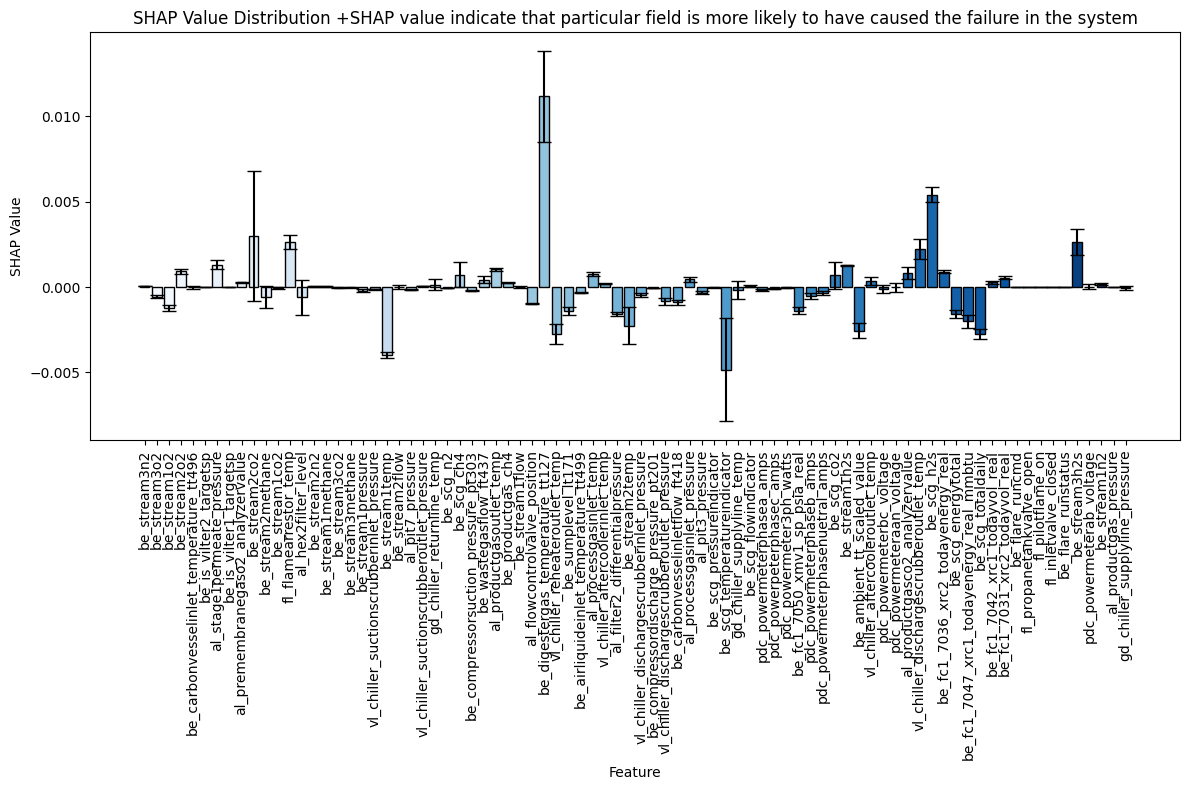

**Biogas Process Analysis and Failure Mitigation Recommendations**

The current biogas process is

 exhibiting several concerning indicators that suggest a high risk of failure.

* **Low Ambient Temperature:** The ambient temperature is unusually low, potentially affecting the efficiency of microbial

 activity in the digester. This can lead to reduced biogas production and increased failure risk.
* **Elevated Nitrogen Concentration:** The high nitrogen concentration indicates potential contamination with air or other external sources. This can inhibit microbial growth and reduce biogas production.
* **Increased Gas Outlet Temperature:** The elevated gas outlet temperature suggests potential

 issues with heat management within the digester. This can lead to thermal stress and decreased microbial activity.
* **Reduced Power Meter Phase-Neutral Amps:** The lower power consumption indicates potential issues with the power generation system. This can affect the process stability and increase failure risk.

**Recommended Actions:**

* **Increase Ambient Temperature:** Ensure optimal ambient temperature for the digester to facilitate microbial activity.
* **Reduce Nitrogen Concentration:** Implement measures to minimize air contamination and prevent nitrogen buildup, such as proper gas handling and maintenance of sealing systems.
* **Optimize Digester Temperature:** Monitor and adjust digester temperature to prevent overheating and ensure

 optimal conditions for microbial growth.
* **Investigate Power Generation System:** Perform maintenance and diagnostic tests on the power generation system to identify and resolve any issues that may affect power consumption.
* **Regular Monitoring:** Implement regular monitoring of process parameters to identify and address potential deviations from optimal conditions promptly. This includes monitoring ambient temperature, gas composition, temperature, and power consumption.
* **Predictive Maintenance:** Utilize historical data and failure probability predictions to schedule preventive maintenance and minimize unplanned failures.
* **Redundancy:** Consider implementing redundancy in critical components, such as power generation systems, to enhance process resilience.

Potential system failure detected! Probability: 0.965846777
Field variations contributing to the failure:
- be_stream3n2: Importance = 6.079511826929273e-05
- be_stream2o2: Importance = 0.0010045170292016438
- al_stage1permeate_pressure: Importance = 0.0014718524299961796
- al_premembranegaso2_analyzervalue: Importance = 0.000300314715391978
- be_stream2co2: Importance = 0.00014448787206705827
- fl_flamearrestor_temp: Importance = 0.002681956149067805
- al_hex2filter_level: Importance = 1.0042481458352805e-05
- be_stream2n2: Importance = 3.922271039433622e-05
- be_stream1methane: Importance = 4.065000662876132e-05
- vl_chiller_suctionscrubberoutlet_pressure: Importance = 7.6223935219787e-05
- gd_chiller_returnline_temp: Importance = 0.00027511684767649004
- be_scg_ch4: Importance = 0.00018265193652519334
- be_wastegasflow_ft437: Importance = 0.00043392930286316846
- al_productgasoutlet_temp: Importance = 0.0011190008369716736
- be_productgas_ch4: Importance = 0.0002525610779570034
- be

In [38]:
 # Set the desired window size
trainer_generator=get_latest_train_data(window_size=datawindow,data=data_new)
run_no=0
while True:
  run_no+=1
  # Get the latest system data
  new_data = next(trainer_generator)#stream in chunk of new data
  print(new_data.head())
  latest_pred_data=get_latest_system_data(new_data)#new data processed to get only training data
  # Predict failure probability
  failure_prob,prediction = predict_failure(latest_pred_data)
  model,shap_values=retrain_model(run_no,new_data)
  shaps=shap_values[0].tolist()
  prompt = f"""**Biogas Process Analysis with Gemini-Pro**
  Current Biogas Process Data and the corresponding SHAP values:
  * Ambient Temperature: {new_data.iloc[0][0]}°C with SHAP value:{shaps[0]}.
  * Nitrogen Concentration: {new_data.iloc[0][1]}% with SHAP value:{shaps[1]}.
  * Methane Concentration: {new_data.iloc[0][2]}% with SHAP value:{shaps[2]}.
  * Gas outlet Temperature: {new_data.iloc[0][3]}°C with SHAP value:{shaps[3]}.
  * Power Meter Phase-Neutral Amps: {new_data.iloc[0][4]}A with SHAP value:{shaps[4]}.
  Potential Failure chance after {-shift} steps:{failure_prob*100}%
  **Based on the data above, can you analyze the current state of the Biogas process and recommend actions to prevent or mitigate potential failures? Note that i am using an LSTM model to predict the failure probabilty also and i have also provided the SHAP values.[Only output the analysis do not mention the LSTM or SHAP]**"""
  gemini(prompt)
  if failure_prob > threshold:
      print(f'Potential system failure detected! Probability: {failure_prob:.9f}')
      print('Field variations contributing to the failure:')
      for feature, importance_list in zip(X.columns, shap_values[0].tolist()):
            for importance in importance_list:
                if importance > 0:
                    #if abs(importance) > 0.001:  # Print only if the absolute SHAP value is greater than 0.001
                    print(f'- {feature}: Importance = {"{}".format(importance)}')
      break

  else:
      print(f'System operating normally. Failure probabilty: {failure_prob:.2f}')



In [28]:
datas = pd.read_csv('/content/drive/MyDrive/Data_ML/temperory_dataset_with_timestamp_test_new.csv')
datas = datas.dropna()
time=datas["timestamp"]
datas=datas.drop("timestamp",axis=1)
actual_targets = datas[target].shift(periods=-shift, fill_value=0).values
d_data=get_latest_system_data(datas)
_,predictions= predict_failure(d_data)
print(actual_targets)

315/315 [==============================] - 1s 2ms/step
[0 0 0 ... 0 0 0]


In [29]:
import matplotlib.pyplot as plt

# Assuming 'target' is the column containing actual target values

plt.figure(figsize=(10, 8))  # Increase the figure height to accommodate two subplots


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [30]:
import numpy as np

# Assuming predictions is a 1D NumPy array

window_size = -shift
max_probs = np.zeros(len(predictions))  # Pre-allocate memory for the new array

# Loop through the predictions array with a sliding window, adjusting for out-of-bounds indices
for i in range(len(max_probs)):

    window_start = max(0, i - window_size)  # Ensure window_start is not negative
    #print(i, window_start)
    window_end = i

    # Handle empty windows:
    if (window_end-window_start) == 0:  # If window_start and window_end are the same, the window is empty
        max_probs[i] = 0  # Assign 0 to the maximum probability (or any other appropriate value)
    else:
        #print(window_start,window_end)
        #print(predictions[window_start+1:window_end+10])
        max_probs[i] = np.max(predictions[window_start:window_end+1])  # Calculate the maximum for non-empty windows


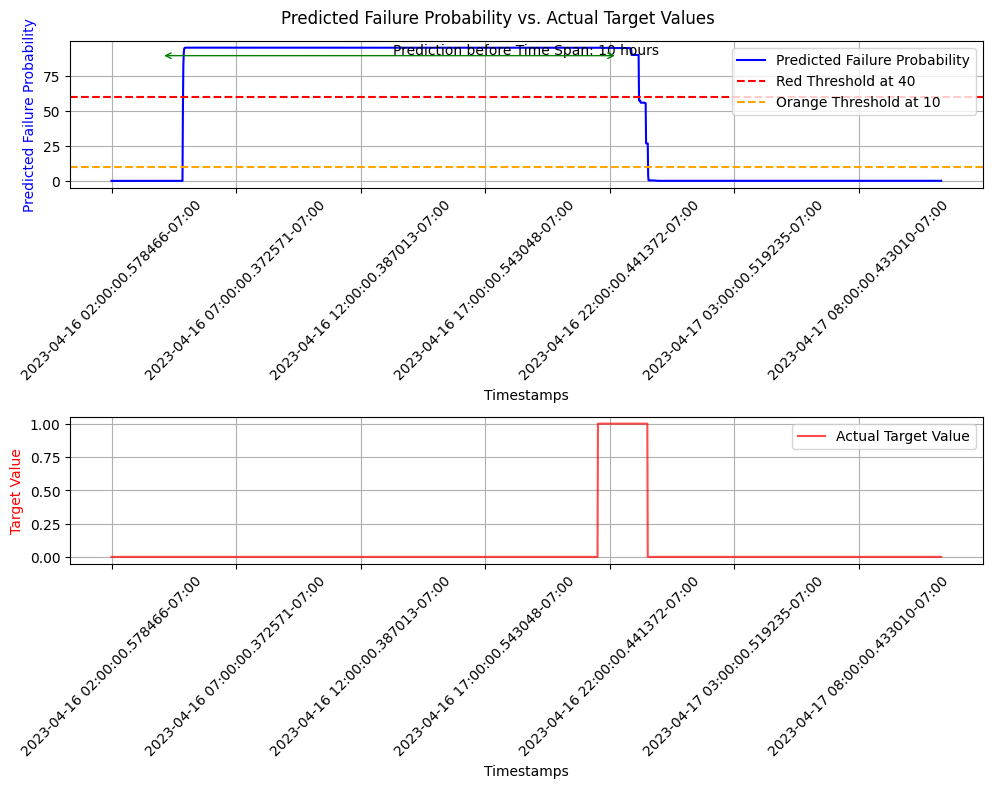

In [39]:
import matplotlib.pyplot as plt

# Assuming 'target' is the column containing actual target values

plt.figure(figsize=(10, 8))  # Increase the figure height to accommodate two subplots

# Ensure predictions are scaled to a meaningful range (e.g., 0-700%)

predictions_scaled = max_probs * 100

# Create the first subplot for predicted probability

plt.subplot(2, 1, 1)  # (rows, columns, subplot_index)

start_idx = 3000

end_idx = 5000

plt.plot(time.iloc[start_idx:end_idx], predictions_scaled[start_idx:end_idx], color='blue', label='Predicted Failure Probability')

plt.axhline(y=60, color='red', linestyle='--', label='Red Threshold at 40')

plt.axhline(y=10, color='orange', linestyle='--', label='Orange Threshold at 10')

plt.ylabel('Predicted Failure Probability', color='blue')

plt.xlabel("Timestamps")

plt.xticks(time.iloc[start_idx:end_idx].values[::300], rotation=45)  # Set x-ticks with a step of 300 and rotate labels

# Add the double-sided arrow for the time span

arrow_x_start = 0.1
arrow_x_end = 0.6
arrow_y = 0.9
text_y = arrow_y + 0.01  # Raise the text slightly above the arrow

plt.annotate('Prediction before Time Span: 10 hours', xy=(0.5, text_y), xycoords='axes fraction', ha='center', fontsize=10)

plt.annotate('', xy=(arrow_x_start, arrow_y), xytext=(arrow_x_end, arrow_y), xycoords='axes fraction', textcoords='axes fraction',
             arrowprops=dict(arrowstyle='<->', color='green'))
plt.legend()

plt.grid(True)

# Create the second subplot for actual target values

plt.subplot(2, 1, 2)  # (rows, columns, subplot_index)

plt.plot(time.iloc[start_idx:end_idx], actual_targets[start_idx:end_idx], color='red', label='Actual Target Value', alpha=0.7)

plt.ylabel('Target Value', color='red')

plt.xlabel("Timestamps")

plt.xticks(time.iloc[start_idx:end_idx].values[::300], rotation=45)  # Set x-ticks with a step of 300 and rotate labels

plt.legend()

plt.grid(True)


plt.suptitle("Predicted Failure Probability vs. Actual Target Values")  # Add an overall title

plt.tight_layout()  # Adjust spacing between subplots

plt.show()

# **Correlation test for the dataset**

In [32]:
data_corr=pd.read_csv('/content/drive/MyDrive/Data_ML/temperory_dataset_with_timestamp_test_corr.csv')

In [33]:
import matplotlib.pyplot as plt
# Define the target variable name (replace with your actual target variable)
target_variable =target
data=data_corr
data=data.drop("timestamp",axis=1)
# Select features and target variable (consider excluding the index column if present)
features = data.columns.difference([target_variable])  # Exclude target variable from features
df_filtered = data[features] .copy()  # Optional: Create a copy to avoid modifying original data

# Calculate the correlation matrix
correlation_matrix = df_filtered.corr(method='spearman')  # Spearman rank correlation for non-normal data

# Display the correlation matrix
print(correlation_matrix)

# # Generate a heatmap for visualization (optional)
# plt.matshow(correlation_matrix, cmap=plt.cm.bwr)
# plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
# plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
# plt.colorbar()
# plt.show()

                                           al_cr_7_do  \
al_cr_7_do                                        NaN   
al_filter2_differentialpressure                   NaN   
al_flowcontrolvalve_position                      NaN   
al_fv_3a_2b_do                                    NaN   
al_fv_9_cmd                                       NaN   
...                                               ...   
vl_chiller_dischargescrubberoutlet_temp           NaN   
vl_chiller_recyclevalve_position                  NaN   
vl_chiller_reheateroutlet_temp                    NaN   
vl_chiller_suctionscrubberinlet_pressure          NaN   
vl_chiller_suctionscrubberoutlet_pressure         NaN   

                                           al_filter2_differentialpressure  \
al_cr_7_do                                                             NaN   
al_filter2_differentialpressure                                   1.000000   
al_flowcontrolvalve_position                                      0.410663   
al_

In [34]:
# Define filename and desired image size (adjust width and height as needed)
filename = "correlation_heatmap.png"
fig, ax = plt.subplots(figsize=(50, 40))  # Set figure size for better readability

# Generate the heatmap
heatmap = ax.matshow(correlation_matrix, cmap=plt.cm.bwr)

# Customize labels and colorbar
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar(heatmap)

# Save the heatmap as an image
fig.savefig(filename, dpi=300, bbox_inches='tight')  # Adjust dpi for higher resolution

print(correlation_matrix)  # Still print the correlation matrix for reference
plt.close(fig)  # Close the plot window (optional)

                                           al_cr_7_do  \
al_cr_7_do                                        NaN   
al_filter2_differentialpressure                   NaN   
al_flowcontrolvalve_position                      NaN   
al_fv_3a_2b_do                                    NaN   
al_fv_9_cmd                                       NaN   
...                                               ...   
vl_chiller_dischargescrubberoutlet_temp           NaN   
vl_chiller_recyclevalve_position                  NaN   
vl_chiller_reheateroutlet_temp                    NaN   
vl_chiller_suctionscrubberinlet_pressure          NaN   
vl_chiller_suctionscrubberoutlet_pressure         NaN   

                                           al_filter2_differentialpressure  \
al_cr_7_do                                                             NaN   
al_filter2_differentialpressure                                   1.000000   
al_flowcontrolvalve_position                                      0.410663   
al_

Correlation Matrix (Positive Correlated Features):
                                           al_hex2filter_level  \
al_hex2filter_level                                   1.000000   
al_premembranegaso2_analyzervalue                    -0.651324   
al_processgasinlet_temp                               0.663978   
al_productgaso2_analyzervalue                        -0.452515   
al_productgasoutlet_temp                              0.119704   
be_aircomp1_runcmd                                    0.812795   
be_aircomp1_runstatus                                 0.812795   
be_airliquideinlet_temperature_tt499                  0.767377   
be_ambient_tt_scaled_value                           -0.582696   
be_carbonvesselinlet_temperature_tt496                0.330687   
be_compressorsuction_pressure_pt303                  -0.381229   
be_condensatelevel_lt711                              0.422344   
be_dginletisolationvalve105_closed                    0.199055   
be_digestergas_temperatur

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


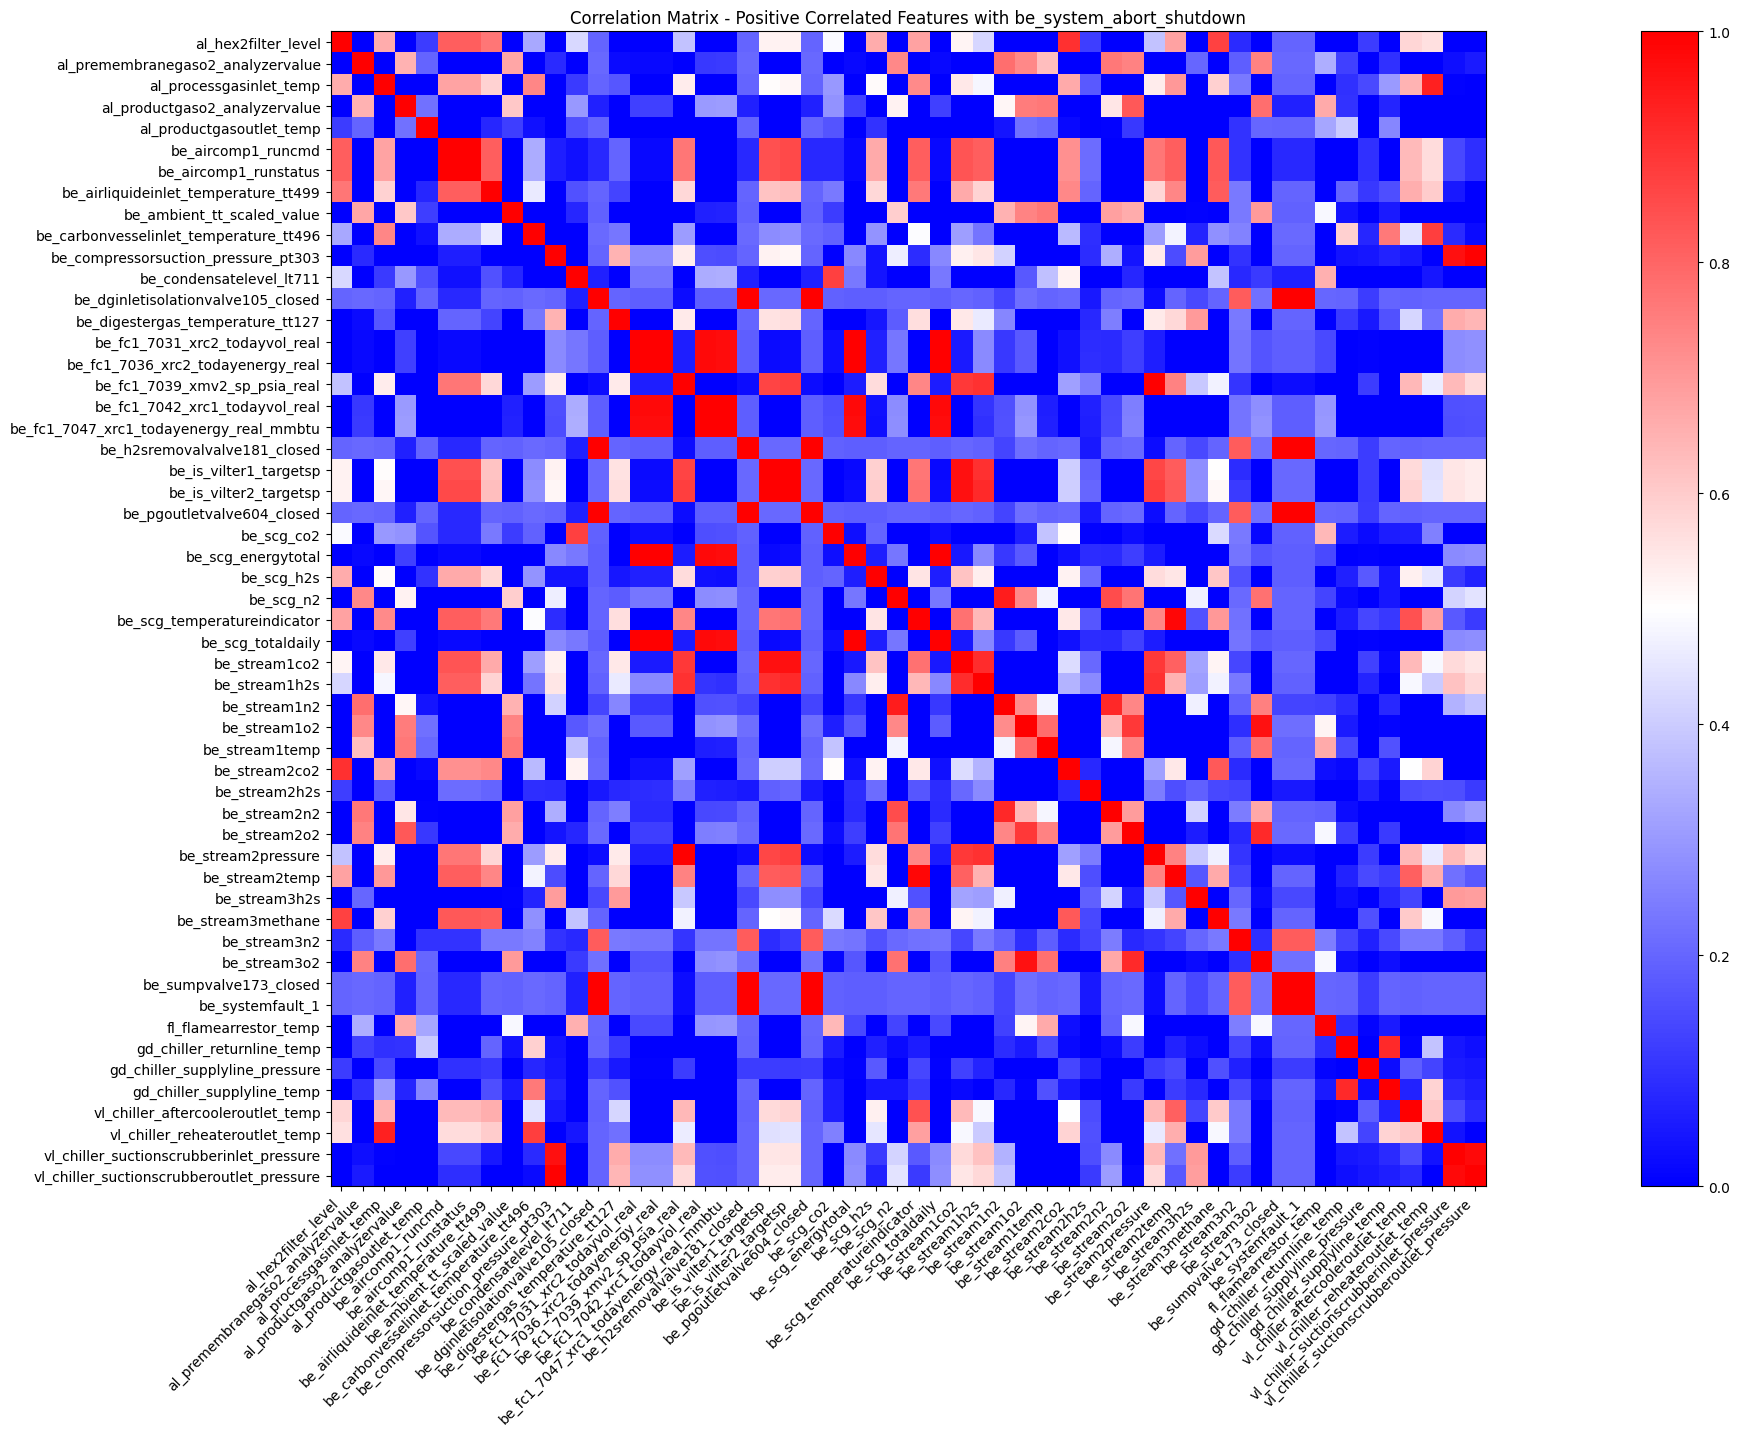

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Define the target variable name (replace with your actual target variable)
target_variable = target
data = data_corr
data = data.drop("timestamp", axis=1)

# Select features and target variable (consider excluding the index column if present)
features = data.columns.difference([target_variable])

# Exclude target variable from features
df_filtered = data[features].copy()  # Optional: Create a copy to avoid modifying original data

# Calculate the correlation matrix
correlation_matrix = df_filtered.corr(method='spearman')

# Calculate the correlation with the target variable
target_correlation = data[features].corrwith(data[target_variable], method='spearman')

# Filter out features with correlation <= 0
positive_corr_features = target_correlation[target_correlation > 0].index

# Create a new correlation matrix with only positive correlated features
positive_corr_matrix = correlation_matrix.loc[positive_corr_features, positive_corr_features]

# Display the correlation matrix with positive correlated features
print("Correlation Matrix (Positive Correlated Features):")
print(positive_corr_matrix)
# Generate a heatmap for visualization (optional)
plt.figure(figsize=(40, 15))

# Create the heatmap using imshow with masking:
heatmap = plt.imshow(positive_corr_matrix, cmap=plt.cm.bwr, vmin=0, vmax=1)
mask = np.any(np.ones_like(positive_corr_matrix, dtype=bool))
heatmap.set_visible(mask)  # Apply the mask to the heatmap

plt.xticks(range(len(positive_corr_matrix.columns)), positive_corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(positive_corr_matrix.columns)), positive_corr_matrix.columns)
plt.colorbar()
plt.title(f"Correlation Matrix - Positive Correlated Features with {target_variable}")
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Highly Correlated Features with be_system_abort_shutdown:
Index(['al_fv_3a_2b_do', 'al_fv_9_cmd', 'be_airliquide_runcmd',
       'be_airliquide_runstatus', 'be_dginletisolationvalve105_closed',
       'be_dginletisolationvalve105_open', 'be_gdchiller_runcmd',
       'be_h2sremovalvalve181_closed', 'be_h2sremovalvalve181_open',
       'be_pgoutletvalve604_closed', 'be_pgoutletvalve604_open',
       'be_stream3n2', 'be_sumpvalve173_closed', 'be_sumpvalve173_open',
       'be_system_running', 'be_systemfault_1', 'be_vilterchiller_runcmd',
       'be_vilterchiller_runstatus', 'be_viltercomp1_runcmd',
       'be_viltercomp1_runstatus', 'be_viltercomp2_faultstatus',
       'be_viltercomp2_runcmd', 'be_viltercomp2_runstatus'],
      dtype='object')


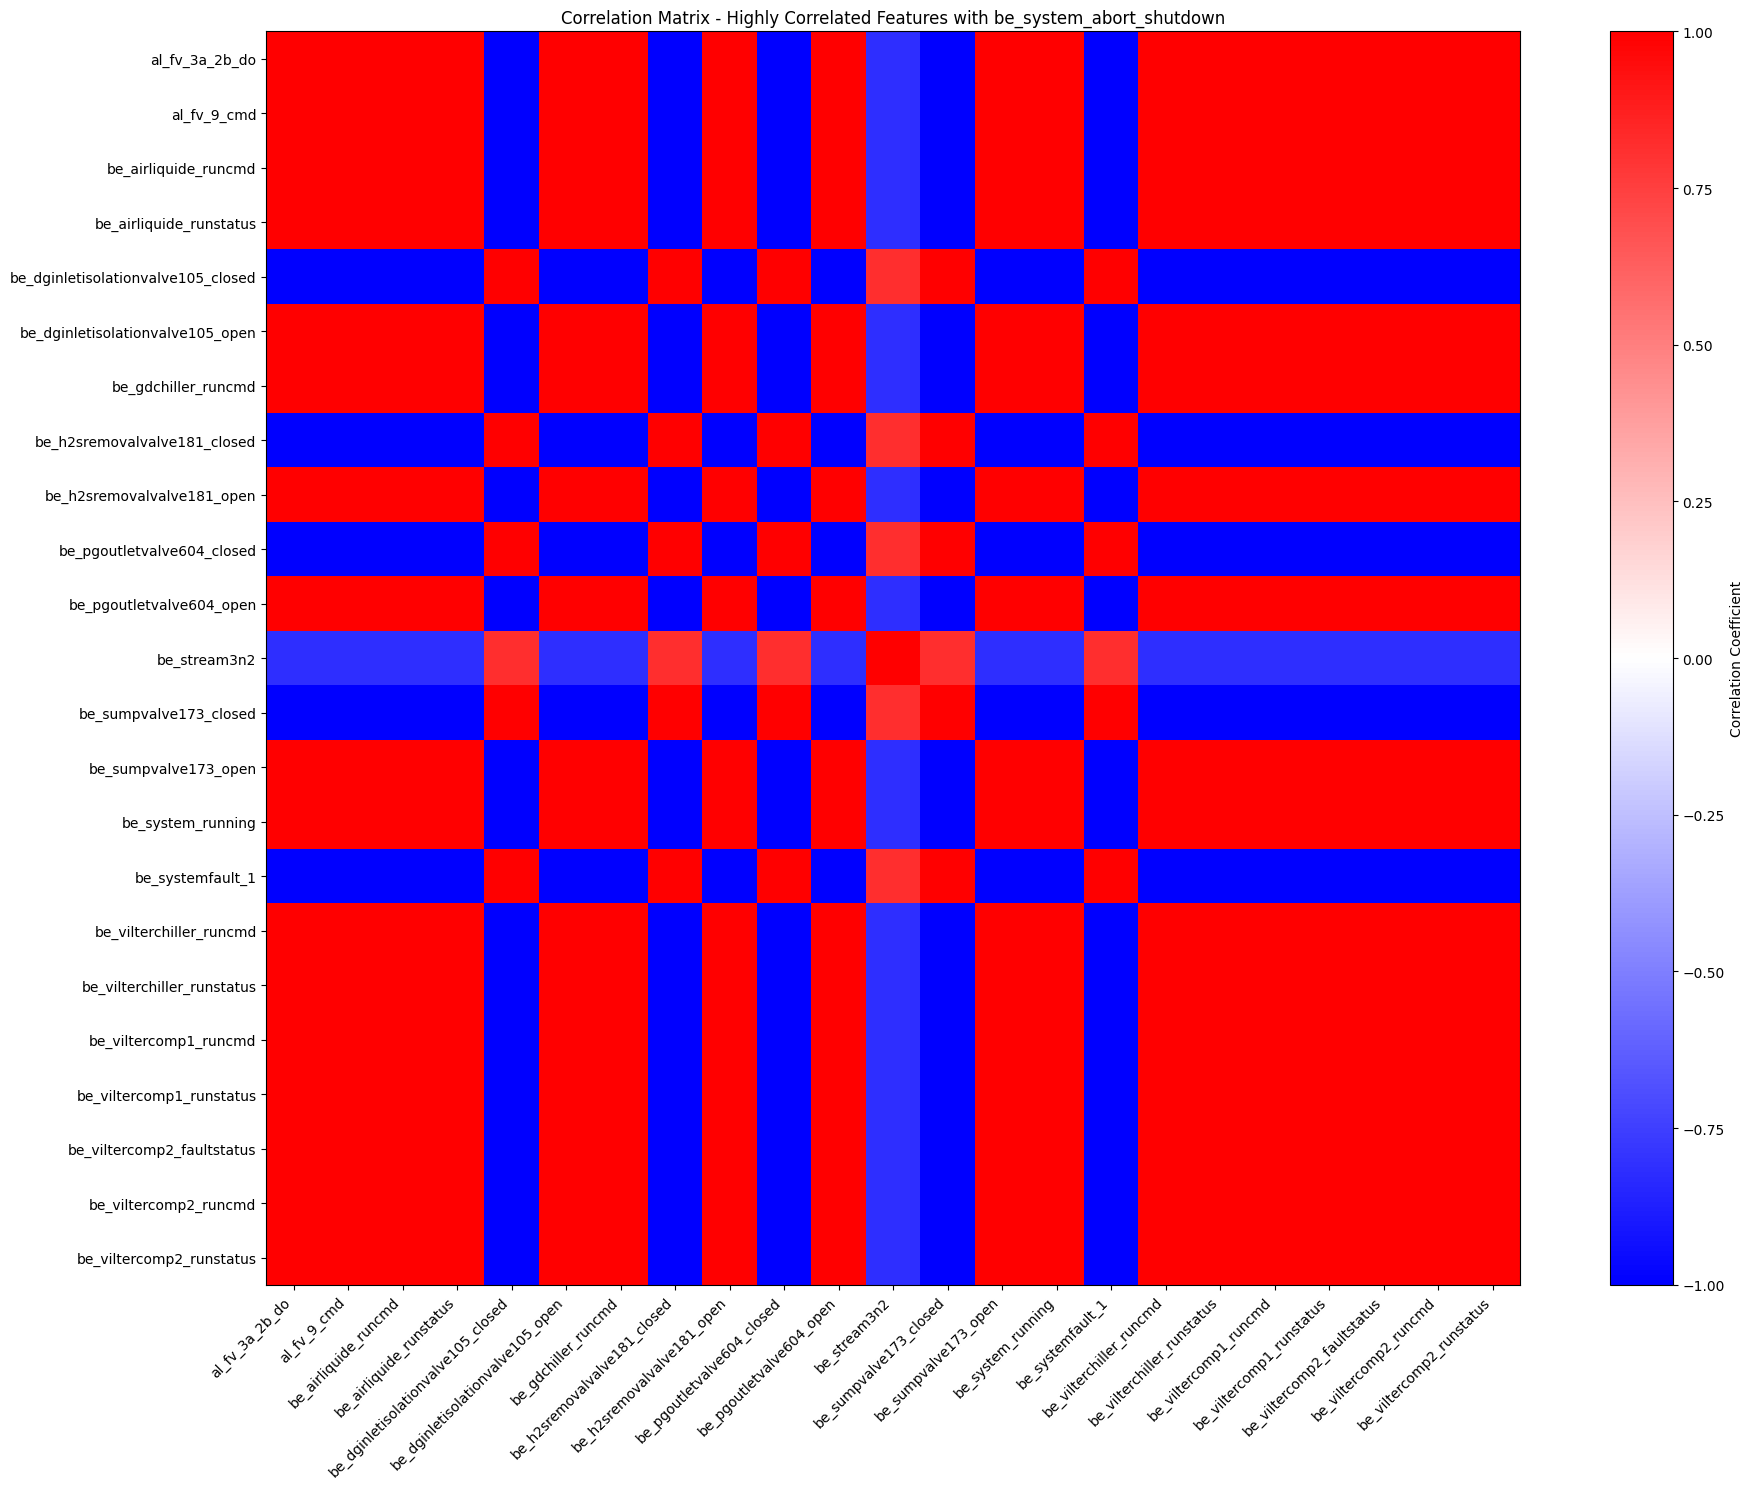

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Define the target variable name (replace with your actual target variable)
target_variable = target
data = data_corr
data=data.dropna()
data = data.drop("timestamp", axis=1)  # Drop timestamp column (assuming it exists)

# Select features and target variable (consider excluding the index column if present)
features = data.columns.difference([target_variable])

# Exclude target variable from features
df_filtered = data[features].copy()  # Optional: Create a copy to avoid modifying original data

# Calculate the correlation matrix
correlation_matrix = df_filtered.corr(method='spearman')

# Calculate the correlation with the target variable
target_correlation = data[features].corrwith(data[target_variable], method='spearman')

# Filter features with high correlation (both positive and negative)
filtered_features = target_correlation[np.abs(target_correlation) > 0.8].index

# Create a new correlation matrix with filtered features
filtered_corr_matrix = correlation_matrix.loc[filtered_features, filtered_features]

# Display results
print("Highly Correlated Features with", target_variable, end=":\n")
print(filtered_features)

# Heatmap with mask (optional)
plt.figure(figsize=(20, 15))  # Increase figure size

# Create the heatmap using imshow with masking:
heatmap = plt.imshow(filtered_corr_matrix, cmap=plt.cm.bwr, vmin=-1, vmax=1)
mask = np.any(np.ones_like(filtered_corr_matrix, dtype=bool))
heatmap.set_visible(mask)  # Apply the mask to the heatmap

# Label adjustments
plt.xticks(range(len(filtered_corr_matrix.columns)), filtered_corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(filtered_corr_matrix.columns)), filtered_corr_matrix.columns)
plt.colorbar(label="Correlation Coefficient")
plt.title(f"Correlation Matrix - Highly Correlated Features with {target_variable}")
plt.tight_layout()  # Improve layout for better readability

# Save the plot (replace 'heatmap.png' with your desired filename)
plt.savefig('heatmap.png')
plt.show()


# **List of correlation to Target value**

Index(['be_stream3n2', 'be_stream3o2', 'be_stream1o2', 'be_stream2o2',
       'be_carbonvesselinlet_temperature_tt496', 'be_is_vilter2_targetsp',
       'al_stage1permeate_pressure', 'be_is_vilter1_targetsp',
       'al_premembranegaso2_analyzervalue', 'be_stream2co2',
       'be_stream2methane', 'be_stream1co2', 'fl_flamearrestor_temp',
       'al_hex2filter_level', 'be_stream2n2', 'be_stream1methane',
       'be_stream3co2', 'be_stream3methane', 'be_stream1pressure',
       'vl_chiller_suctionscrubberinlet_pressure', 'be_stream1temp',
       'be_stream2flow', 'al_pit7_pressure',
       'vl_chiller_suctionscrubberoutlet_pressure',
       'gd_chiller_returnline_temp', 'be_scg_n2', 'be_scg_ch4',
       'be_compressorsuction_pressure_pt303', 'be_wastegasflow_ft437',
       'al_productgasoutlet_temp', 'be_productgas_ch4', 'be_stream1flow',
       'al_flowcontrolvalve_position', 'be_digestergas_temperature_tt127',
       'vl_chiller_reheateroutlet_temp', 'be_sumplevel_lt171',
       'be_ai

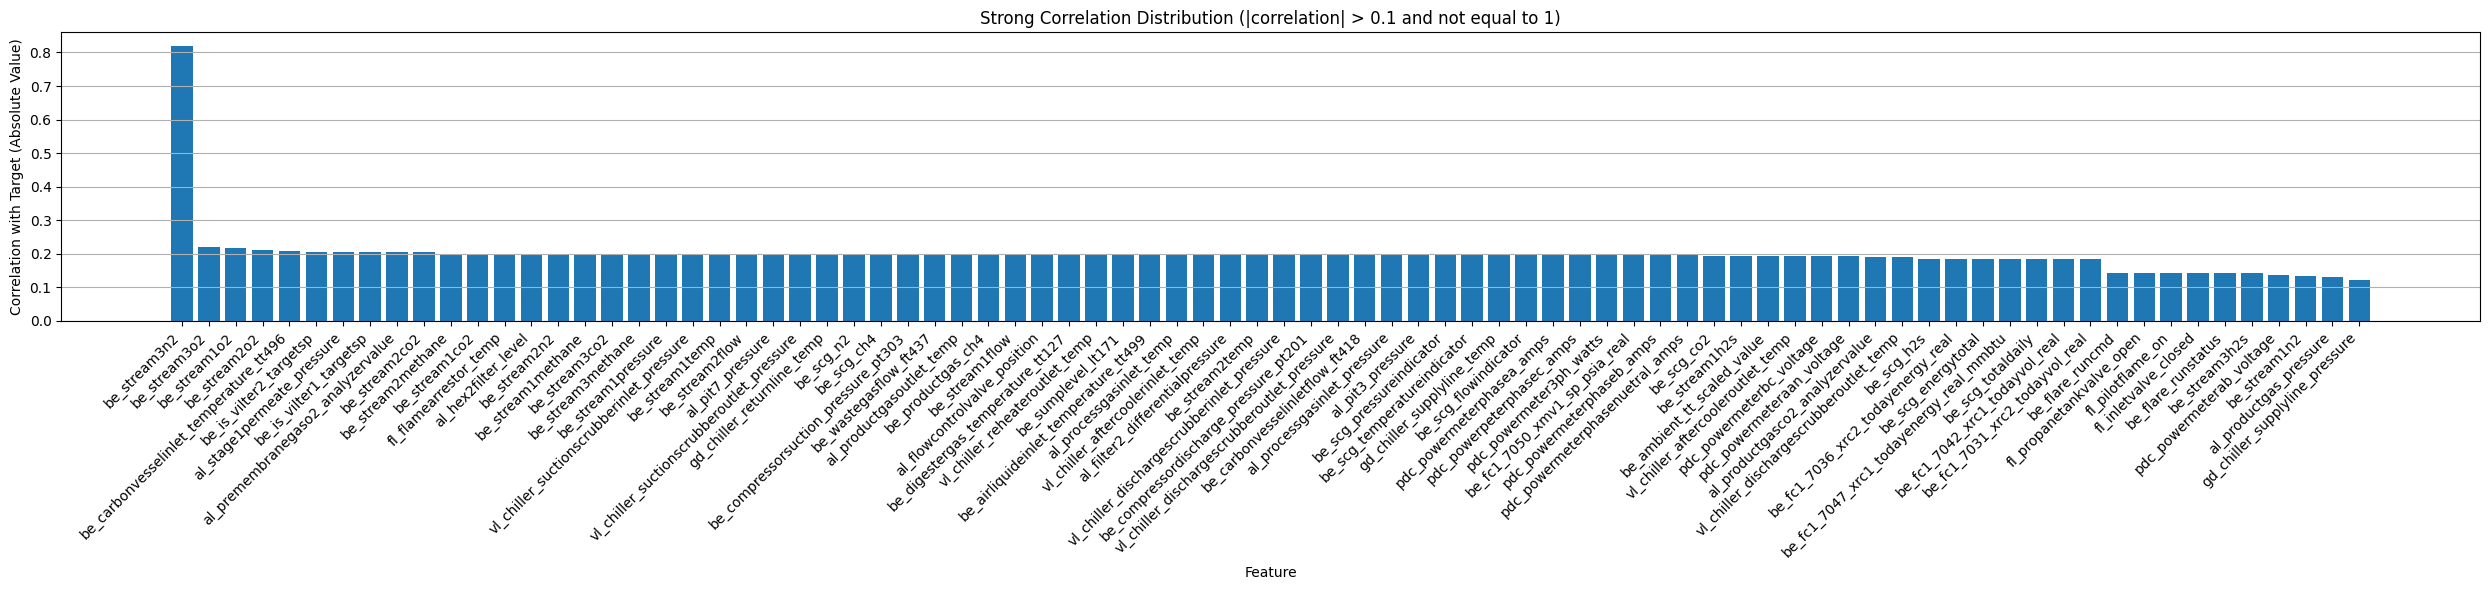

In [37]:
# Filter features with correlation > 0.7 or < -0.7 (absolute values)
filtered_corr = target_correlation[((target_correlation > 0.1) & (target_correlation != 1)) | ((target_correlation < -0.1) & (target_correlation != -1))]

# Sort filtered correlations (if any)
if not filtered_corr.empty:
  sorted_corr = filtered_corr.abs().sort_values(ascending=False)  # Sort by absolute values
  # Prepare data for histogram (optional)
  features = sorted_corr.index.to_numpy()   # Convert index to NumPy array
  correlations = sorted_corr.to_numpy()   # Convert Series to NumPy array
  print(sorted_corr.keys())
  # Print correlation values and corresponding column names
  print("Strong Correlations with Target Variable (|correlation| > 0.7):")
  for feature, correlation in sorted_corr.items():
    print(f"{feature}: {correlation:.4f}")

  # Create the histogram (optional)
  plt.figure(figsize=(25, 6))
  plt.bar(features, correlations)
  plt.xticks(rotation=45, ha='right')  # Rotate feature labels for readability
  plt.xlabel("Feature")
  plt.ylabel("Correlation with Target (Absolute Value)")
  plt.title("Strong Correlation Distribution (|correlation| > 0.1 and not equal to 1)")
  plt.grid(axis='y')  # Add gridlines for better visualization
  plt.tight_layout()
  plt.show()
else:
  print("No strong correlations found (|correlation| > 0.7).")